DataFrame успешно загружен.


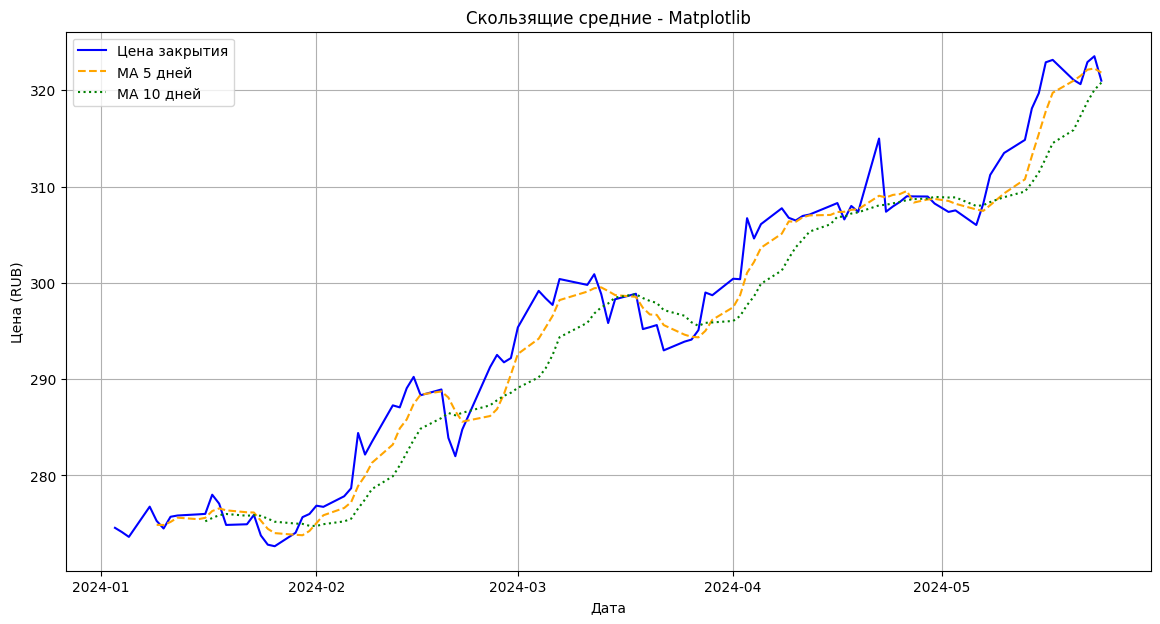

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from data_loader import load_data  # Импортируем функцию load_data из файла data_loader.py

def plot_matplotlib():
    # Загрузка данных
    df = load_data()

    # Проверка, что данные загружены корректно
    if df.empty:
        print("DataFrame пуст. Проверьте источник данных.")
        return  # Завершение функции, если данные не загружены
    else:
        print("DataFrame успешно загружен.")

    # Добавление скользящих средних в DataFrame, если их нет
    if 'CLOSE' in df.columns:
        df['MA5'] = df['CLOSE'].rolling(window=5).mean()
        df['MA10'] = df['CLOSE'].rolling(window=10).mean()
    else:
        print("Столбец 'CLOSE' отсутствует. Проверьте данные.")
        return

    # Проверка наличия необходимых столбцов после добавления
    required_columns = {'TRADEDATE', 'CLOSE', 'MA5', 'MA10'}
    if not required_columns.issubset(df.columns):
        print("Некоторые столбцы отсутствуют в данных даже после добавления MA5 и MA10.")
        return

    # Построение графика скользящих средних
    plt.figure(figsize=(14, 7))
    plt.plot(df['TRADEDATE'], df['CLOSE'], label='Цена закрытия', color='blue')
    plt.plot(df['TRADEDATE'], df['MA5'], label='MA 5 дней', color='orange', linestyle='--')
    plt.plot(df['TRADEDATE'], df['MA10'], label='MA 10 дней', color='green', linestyle=':')

    # Настройки графика
    plt.title('Скользящие средние - Matplotlib')
    plt.xlabel('Дата')
    plt.ylabel('Цена (RUB)')
    plt.legend()
    plt.grid(True)

    # Отображение графика
    plt.show()
plot_matplotlib()


In [4]:
import pandas as pd
import numpy as np

# Пример данных
dates = pd.date_range(start='2023-01-01', periods=100)
prices = np.random.uniform(low=100, high=200, size=100)
ma5 = pd.Series(prices).rolling(window=5).mean()
ma10 = pd.Series(prices).rolling(window=10).mean()

df = pd.DataFrame({
    'TRADEDATE': dates,
    'CLOSE': prices,
    'MA5': ma5,
    'MA10': ma10
})

# Вызов функции
plot_plotly(df)